# Compression

In [1]:
import os
import matplotlib.pyplot as plt
import torch

In [3]:
torch.set_num_threads(1)
cwd = os.getcwd()

## Tensorized models

In [17]:
embedding_fn = 'poly',
embed_dim = 2
# bond_dim = 5
domain_multiplier = 1
n_samples = 100

bond_dim_lst = ['Baseline', 2, 5, 10]
models_lst = ['Micro', 'Tiny', 'Small', 'Medium', 'Big', 'Large', 'Huge']

models_dir = os.path.join(cwd, '..', '..', 'results', '3_compression')

# Baseline accuracies
model_files = [
    list(filter(lambda f: f.startswith(f'fffc_{model.lower()}') and f.endswith('.pt'),
                os.listdir(models_dir)))[0]
    for model in models_lst]
model_accs = [float(file.split('_')[-1][:-3]) for file in model_files]


# Get max accuracies by bond_dim
max_accs_bond_dim_lst = [torch.tensor(model_accs)]
for bond_dim in bond_dim_lst[1:]:
    max_accs_lst = []
    for model in models_lst:
        cores_dir = os.path.join(
            models_dir,
            f'recores_fffc_{model.lower()}')
        cores_file = list(filter(lambda f: f.startswith(f'{bond_dim}'),
                                 os.listdir(cores_dir)))[0]
        
        max_accs_lst.append(torch.tensor(float(cores_file.split('_')[-2])))
    
    max_accs_bond_dim_lst.append(torch.stack(max_accs_lst, dim=0))

max_accs_bond_dim = torch.stack(max_accs_bond_dim_lst, dim=0)

### Figure

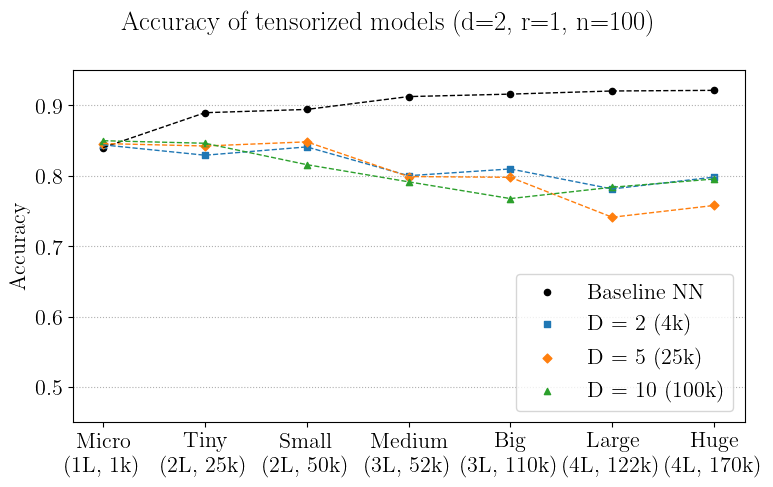

In [18]:
# plt.rc('font', family='serif', size=15)
plt.rc('font', family='serif', serif='Computer Modern', size=16)
plt.rc('text', usetex=True)

colormap = plt.get_cmap("tab10")
colors = ['black', 'tab:blue', 'tab:orange', 'tab:green']

markers = ['o', 's', 'D', '^']
labels = ['Baseline NN', 'D = 2 (4k)', 'D = 5 (25k)', 'D = 10 (100k)']
model_sizes = {'Micro': '(1L, 1k)',
               'Tiny': '(2L, 25k)',
               'Small':'(2L, 50k)',
               'Medium':'(3L, 52k)',
               'Big':'(3L, 110k)',
               'Large':'(4L, 122k)',
               'Huge': '(4L, 170k)'}

fig, axs = plt.subplots(1, 1, figsize=(8, 5))

# Accuracies tensorized models
# ----------------------------
for i, (D, accs) in enumerate(zip(bond_dim_lst, max_accs_bond_dim)):
    
    aux_models = [f'{m}\n{model_sizes[m]}' for m in models_lst]
        
    axs.plot(aux_models, accs, linestyle='--', linewidth=1., color=colors[i])
    axs.scatter(x=aux_models, y=accs, marker=markers[i], s=20.,
                color=colors[i], label=labels[i])
    
# Set axes
axs.set_ylim(0.45, 0.95)
axs.yaxis.grid(linestyle=':')

# Adding labels and title
# axs[0].set_xlabel('Neural Network model')
axs.set_ylabel('Accuracy')
axs.legend(loc='lower right', bbox_to_anchor=(1., 0.))
# axs[0].set_title('Max. Acc. of 50 runs')


fig.suptitle('Accuracy of tensorized models (d=2, r=1, n=100)')

plt.tight_layout(pad=1.)
plt.show()

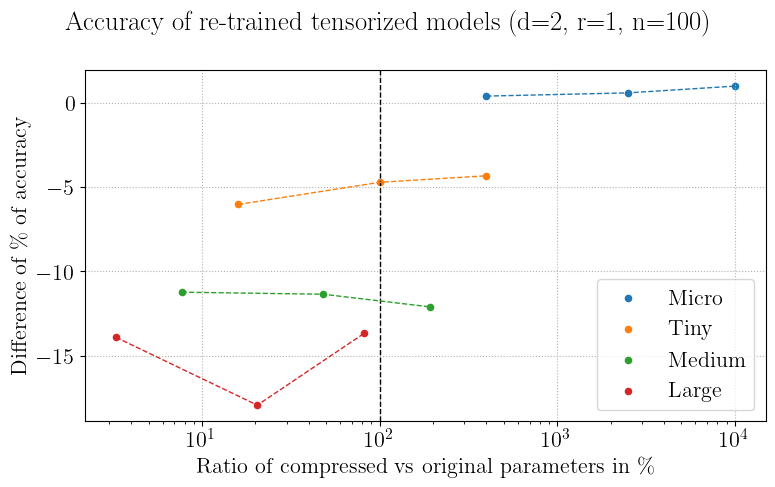

In [19]:
# plt.rc('font', family='serif', size=15)
plt.rc('font', family='serif', serif='Computer Modern', size=16)
plt.rc('text', usetex=True)

colormap = plt.get_cmap("tab10")
# colors = ['black', 'tab:blue', 'tab:orange', 'tab:green']

# markers = ['o', 's', 'D', '^']
# labels = ['Baseline NN', 'D = 2 (4k)', 'D = 5 (25k)', 'D = 10 (100k)']
model_sizes = {'Micro': 1000,
               'Tiny': 25000,
               #'Small': 50000,
               'Medium': 52000,
               #'Big': 110000,
               'Large': 122000,
               #'Huge': 170000
               }
mps_sizes = torch.Tensor([4000, 25000, 100000])
diff_accs = (max_accs_bond_dim.t()[[0, 1, 3, 5], 1:] - \
    max_accs_bond_dim.t()[[0, 1, 3, 5], :1]) * 100

fig, axs = plt.subplots(1, 1, figsize=(8, 5))

axs.axvline(x=100, linestyle='--', linewidth=1., color='black')

# Accuracies tensorized models
# ----------------------------
for i, (model_name, da) in enumerate(zip(model_sizes.keys(), diff_accs)):
    
    # aux_models = [f'{m}\n{model_sizes[m]}' for m in models_lst]
        
    x = (mps_sizes / model_sizes[model_name]) * 100
    axs.plot(x, da, linestyle='--', linewidth=1.)
    axs.scatter(x=x, y=da, s=20., label=model_name)
    
# Set axes
# axs.set_ylim(0.45, 0.95)
axs.yaxis.grid(linestyle=':')
axs.xaxis.grid(linestyle=':')
axs.set_xscale('log')
# axs.set_xlim(0.1, 200)

# Adding labels and title
# axs[0].set_xlabel('Neural Network model')
axs.set_ylabel('Difference of \% of accuracy')
axs.set_xlabel('Ratio of compressed vs original parameters in \%')
axs.legend(loc='lower right', bbox_to_anchor=(1., 0.))
# axs[0].set_title('Max. Acc. of 50 runs')


fig.suptitle('Accuracy of re-trained tensorized models (d=2, r=1, n=100)')

plt.tight_layout(pad=1.)
plt.show()

## Re-trained tensorized models

In [13]:
embedding_fn = 'poly',
embed_dim = 2
# bond_dim = 5
domain_multiplier = 1
n_samples = 100

bond_dim_lst = ['Baseline', 2, 5, 10]
models_lst = ['Micro', 'Tiny', 'Small', 'Medium', 'Big', 'Large', 'Huge']

models_dir = os.path.join(cwd, '..', '..', 'results', '3_compression')

# Baseline accuracies
model_files = [
    list(filter(lambda f: f.startswith(f'fffc_{model.lower()}') and f.endswith('.pt'),
                os.listdir(models_dir)))[0]
    for model in models_lst]
model_accs = [float(file.split('_')[-1][:-3]) for file in model_files]


# Get max accuracies by bond_dim
max_accs_bond_dim_lst = [torch.tensor(model_accs)]
for bond_dim in bond_dim_lst[1:]:
    max_accs_lst = []
    for model in models_lst:
        cores_dir = os.path.join(
            models_dir,
            f'recores_fffc_{model.lower()}')
        cores_file = list(filter(lambda f: f.startswith(f'{bond_dim}'),
                                 os.listdir(cores_dir)))[0]
        
        max_accs_lst.append(torch.tensor(float(cores_file.split('_')[-1][:-3])))
    
    max_accs_bond_dim_lst.append(torch.stack(max_accs_lst, dim=0))

max_accs_bond_dim = torch.stack(max_accs_bond_dim_lst, dim=0)

### Figure

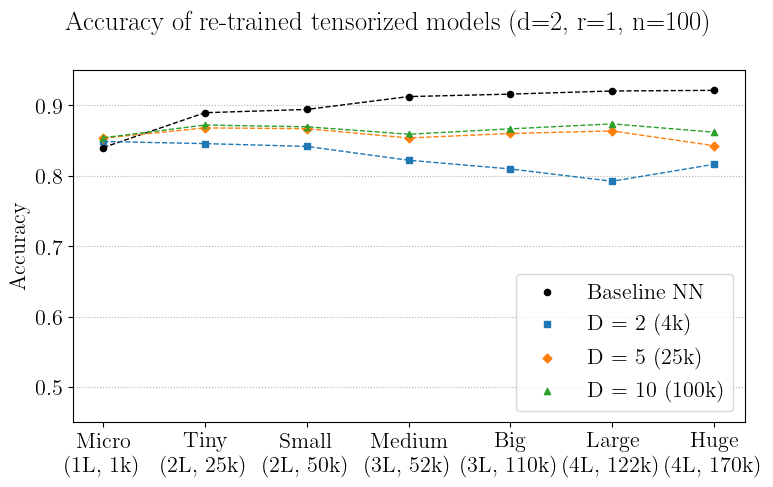

In [14]:
# plt.rc('font', family='serif', size=15)
plt.rc('font', family='serif', serif='Computer Modern', size=16)
plt.rc('text', usetex=True)

colormap = plt.get_cmap("tab10")
colors = ['black', 'tab:blue', 'tab:orange', 'tab:green']

markers = ['o', 's', 'D', '^']
labels = ['Baseline NN', 'D = 2 (4k)', 'D = 5 (25k)', 'D = 10 (100k)']
model_sizes = {'Micro': '(1L, 1k)',
               'Tiny': '(2L, 25k)',
               'Small':'(2L, 50k)',
               'Medium':'(3L, 52k)',
               'Big':'(3L, 110k)',
               'Large':'(4L, 122k)',
               'Huge': '(4L, 170k)'}

fig, axs = plt.subplots(1, 1, figsize=(8, 5))

# Accuracies tensorized models
# ----------------------------
for i, (D, accs) in enumerate(zip(bond_dim_lst, max_accs_bond_dim)):
    
    aux_models = [f'{m}\n{model_sizes[m]}' for m in models_lst]
        
    axs.plot(aux_models, accs, linestyle='--', linewidth=1., color=colors[i])
    axs.scatter(x=aux_models, y=accs, marker=markers[i], s=20.,
                color=colors[i], label=labels[i])
    
# Set axes
axs.set_ylim(0.45, 0.95)
axs.yaxis.grid(linestyle=':')

# Adding labels and title
# axs[0].set_xlabel('Neural Network model')
axs.set_ylabel('Accuracy')
axs.legend(loc='lower right', bbox_to_anchor=(1., 0.))
# axs[0].set_title('Max. Acc. of 50 runs')


fig.suptitle('Accuracy of re-trained tensorized models (d=2, r=1, n=100)')

plt.tight_layout(pad=1.)
plt.show()

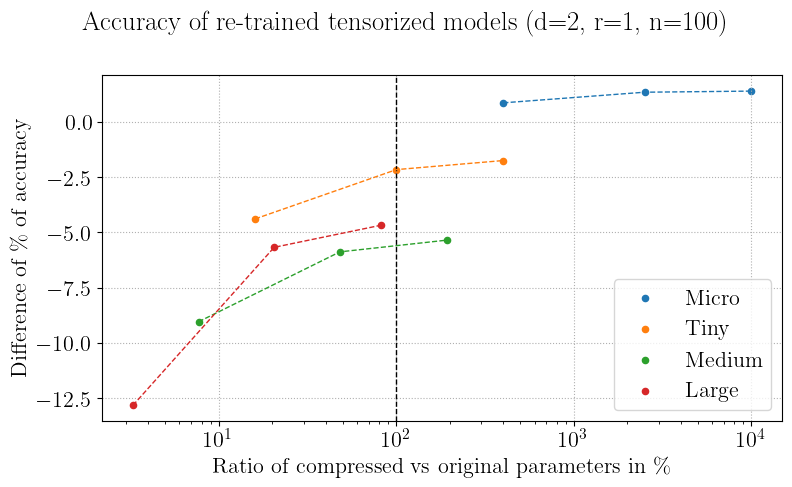

In [16]:
# plt.rc('font', family='serif', size=15)
plt.rc('font', family='serif', serif='Computer Modern', size=16)
plt.rc('text', usetex=True)

colormap = plt.get_cmap("tab10")
# colors = ['black', 'tab:blue', 'tab:orange', 'tab:green']

# markers = ['o', 's', 'D', '^']
# labels = ['Baseline NN', 'D = 2 (4k)', 'D = 5 (25k)', 'D = 10 (100k)']
model_sizes = {'Micro': 1000,
               'Tiny': 25000,
               #'Small': 50000,
               'Medium': 52000,
               #'Big': 110000,
               'Large': 122000,
               #'Huge': 170000
               }
mps_sizes = torch.Tensor([4000, 25000, 100000])
diff_accs = (max_accs_bond_dim.t()[[0, 1, 3, 5], 1:] - \
    max_accs_bond_dim.t()[[0, 1, 3, 5], :1]) * 100

fig, axs = plt.subplots(1, 1, figsize=(8, 5))

axs.axvline(x=100, linestyle='--', linewidth=1., color='black')

# Accuracies tensorized models
# ----------------------------
for i, (model_name, da) in enumerate(zip(model_sizes.keys(), diff_accs)):
    
    # aux_models = [f'{m}\n{model_sizes[m]}' for m in models_lst]
        
    x = (mps_sizes / model_sizes[model_name]) * 100
    axs.plot(x, da, linestyle='--', linewidth=1.)
    axs.scatter(x=x, y=da, s=20., label=model_name)
    
# Set axes
# axs.set_ylim(0.45, 0.95)
axs.yaxis.grid(linestyle=':')
axs.xaxis.grid(linestyle=':')
axs.set_xscale('log')
# axs.set_xlim(0.1, 200)

# Adding labels and title
# axs[0].set_xlabel('Neural Network model')
axs.set_ylabel('Difference of \% of accuracy')
axs.set_xlabel('Ratio of compressed vs original parameters in \%')
axs.legend(loc='lower right', bbox_to_anchor=(1., 0.))
# axs[0].set_title('Max. Acc. of 50 runs')


fig.suptitle('Accuracy of re-trained tensorized models (d=2, r=1, n=100)')

plt.tight_layout(pad=1.)
plt.show()

## LW-tensorized models

In [7]:
bond_dim_lst = ['Baseline', 2, 5, 10, 20]
models_lst = ['Micro', 'Tiny', 'Small', 'Medium', 'Big', 'Large', 'Huge']

models_dir = os.path.join(cwd, '..', '..', 'results', '3_compression')

# Baseline accuracies
model_files = [
    list(filter(lambda f: f.startswith(f'fffc_{model.lower()}') and f.endswith('.pt'),
                os.listdir(models_dir)))[0]
    for model in models_lst]
model_accs = [float(file.split('_')[-1][:-3]) for file in model_files]


sizes_bond_dim_lst = []
accs_bond_dim_lst = [torch.tensor(model_accs)]
for bond_dim in bond_dim_lst[1:]:
    sizes_models_lst = []
    accs_models_lst = []
    for model in models_lst:
        model_dir = os.path.join(models_dir,
                                f'fffc_{model.lower()}_tn')
        model_file = list(filter(lambda f: f.startswith(f'{bond_dim}_'),
                                 os.listdir(model_dir)))[0].split('_')
        
        model_size = int(model_file[2])
        model_acc = float(model_file[3])
    
        sizes_models_lst.append(model_size)
        accs_models_lst.append(model_acc)
    
    sizes_bond_dim_lst.append(torch.tensor(sizes_models_lst))
    accs_bond_dim_lst.append(torch.tensor(accs_models_lst))
    
sizes_bond_dim = torch.stack(sizes_bond_dim_lst, dim=0)
accs_bond_dim = torch.stack(accs_bond_dim_lst, dim=0)

sizes_bond_dim, accs_bond_dim

(tensor([[  102,   384,   450,   618,   836,  1070,  1368],
         [  372,  1287,  1575,  2163,  2888,  3764,  4758],
         [ 1012,  3512,  4170,  5238,  7112,  8838, 12080],
         [ 1012, 11712, 12870, 15018, 18512, 21938, 30960]]),
 tensor([[0.8401, 0.8896, 0.8942, 0.9125, 0.9160, 0.9204, 0.9214],
         [0.8351, 0.8273, 0.8412, 0.7580, 0.7842, 0.4945, 0.5387],
         [0.8397, 0.8622, 0.8611, 0.8126, 0.8440, 0.7621, 0.6972],
         [0.8399, 0.8766, 0.8758, 0.8897, 0.8360, 0.8618, 0.7448],
         [0.8399, 0.8870, 0.8895, 0.9030, 0.8929, 0.8927, 0.8906]]))

### Figure

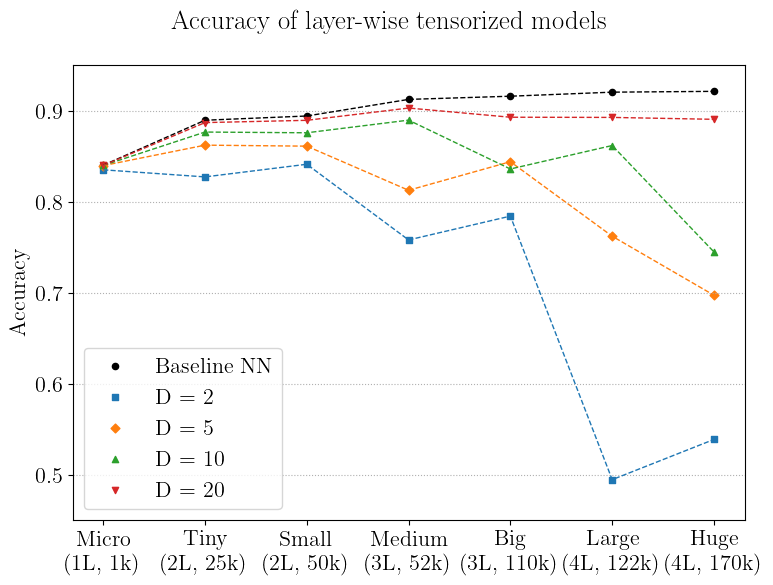

In [8]:
# plt.rc('font', family='serif', size=15)
plt.rc('font', family='serif', serif='Computer Modern', size=16)
plt.rc('text', usetex=True)

colormap = plt.get_cmap("tab10")
colors = ['black', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red']

markers = ['o', 's', 'D', '^', 'v']
labels = ['Baseline NN', 'D = 2', 'D = 5', 'D = 10', 'D = 20']
model_sizes = {'Micro': '(1L, 1k)',
               'Tiny': '(2L, 25k)',
               'Small':'(2L, 50k)',
               'Medium':'(3L, 52k)',
               'Big':'(3L, 110k)',
               'Large':'(4L, 122k)',
               'Huge': '(4L, 170k)'}

fig, axs = plt.subplots(1, 1, figsize=(8, 6))

# Accuracies tensorized models
# ----------------------------
for i, (D, accs) in enumerate(zip(bond_dim_lst, accs_bond_dim)):
    
    aux_models = [f'{m}\n{model_sizes[m]}' for m in models_lst]
        
    axs.plot(aux_models, accs, linestyle='--', linewidth=1., color=colors[i])
    axs.scatter(x=aux_models, y=accs, marker=markers[i], s=20.,
                   color=colors[i], label=labels[i])
    
# Set axes
axs.set_ylim(0.45, 0.95)
axs.yaxis.grid(linestyle=':')

# Adding labels and title
# axs[0].set_xlabel('Neural Network model')
axs.set_ylabel('Accuracy')
axs.legend(loc='lower left', bbox_to_anchor=(0., 0.))


fig.suptitle('Accuracy of layer-wise tensorized models')

plt.tight_layout(pad=1.)
plt.show()

## Re-trained LW-tensorized models

In [30]:
bond_dim_lst = ['Baseline', 2, 5, 10, 20]
models_lst = ['Micro', 'Tiny', 'Small', 'Medium', 'Big', 'Large', 'Huge']

models_dir = os.path.join(cwd, '..', '..', 'results', '3_compression')

# Baseline accuracies
model_files = [
    list(filter(lambda f: f.startswith(f'fffc_{model.lower()}') and f.endswith('.pt'),
                os.listdir(models_dir)))[0]
    for model in models_lst]
model_accs = [float(file.split('_')[-1][:-3]) for file in model_files]


sizes_bond_dim_lst = []
accs_bond_dim_lst = [torch.tensor(model_accs)]
for bond_dim in bond_dim_lst[1:]:
    sizes_models_lst = []
    accs_models_lst = []
    for model in models_lst:
        model_dir = os.path.join(models_dir,
                                f'fffc_{model.lower()}_tn')
        model_file = list(filter(lambda f: f.startswith(f'{bond_dim}_'),
                                 os.listdir(model_dir)))[0].split('_')
        
        model_size = int(model_file[2])
        model_acc = float(model_file[4][:-3])
    
        sizes_models_lst.append(model_size)
        accs_models_lst.append(model_acc)
    
    sizes_bond_dim_lst.append(torch.tensor(sizes_models_lst))
    accs_bond_dim_lst.append(torch.tensor(accs_models_lst))
    
sizes_bond_dim = torch.stack(sizes_bond_dim_lst, dim=0)
accs_bond_dim = torch.stack(accs_bond_dim_lst, dim=0)

sizes_bond_dim, accs_bond_dim

(tensor([[  102,   384,   450,   618,   836,  1070,  1368],
         [  372,  1287,  1575,  2163,  2888,  3764,  4758],
         [ 1012,  3512,  4170,  5238,  7112,  8838, 12080],
         [ 1012, 11712, 12870, 15018, 18512, 21938, 30960]]),
 tensor([[0.8401, 0.8896, 0.8942, 0.9125, 0.9160, 0.9204, 0.9214],
         [0.8467, 0.8680, 0.8630, 0.8617, 0.8529, 0.8597, 0.8653],
         [0.8397, 0.8791, 0.8775, 0.8811, 0.8724, 0.8770, 0.8732],
         [0.8443, 0.8798, 0.8860, 0.8944, 0.8818, 0.8832, 0.8827],
         [0.8443, 0.8870, 0.8895, 0.9030, 0.8950, 0.8927, 0.8908]]))

### Figure

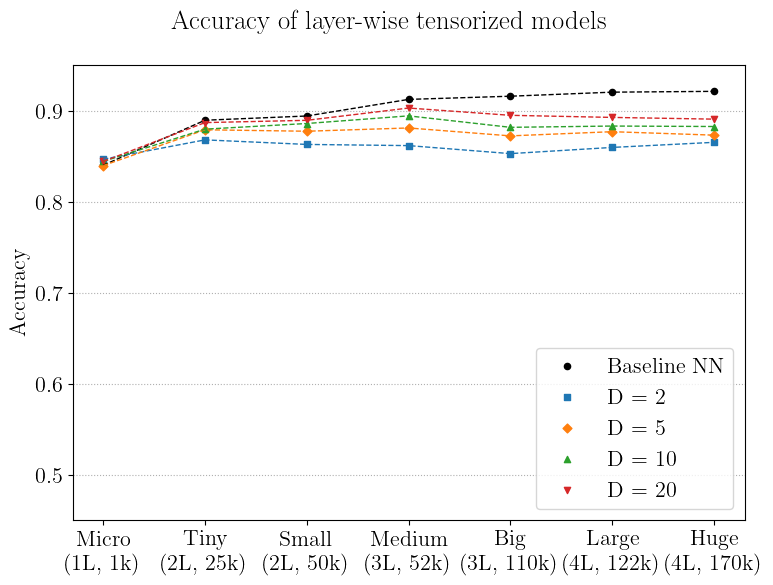

In [12]:
# plt.rc('font', family='serif', size=15)
plt.rc('font', family='serif', serif='Computer Modern', size=16)
plt.rc('text', usetex=True)

colormap = plt.get_cmap("tab10")
colors = ['black', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red']

markers = ['o', 's', 'D', '^', 'v']
labels = ['Baseline NN', 'D = 2', 'D = 5', 'D = 10', 'D = 20']
model_sizes = {'Micro': '(1L, 1k)',
               'Tiny': '(2L, 25k)',
               'Small':'(2L, 50k)',
               'Medium':'(3L, 52k)',
               'Big':'(3L, 110k)',
               'Large':'(4L, 122k)',
               'Huge': '(4L, 170k)'}

fig, axs = plt.subplots(1, 1, figsize=(8, 6))

# Accuracies tensorized models
# ----------------------------
for i, (D, accs) in enumerate(zip(bond_dim_lst, accs_bond_dim)):
    
    aux_models = [f'{m}\n{model_sizes[m]}' for m in models_lst]
        
    axs.plot(aux_models, accs, linestyle='--', linewidth=1., color=colors[i])
    axs.scatter(x=aux_models, y=accs, marker=markers[i], s=20.,
                   color=colors[i], label=labels[i])
    
# Set axes
axs.set_ylim(0.45, 0.95)
axs.yaxis.grid(linestyle=':')

# Adding labels and title
# axs[0].set_xlabel('Neural Network model')
axs.set_ylabel('Accuracy')
axs.legend(loc='lower right', bbox_to_anchor=(1., 0.))


fig.suptitle('Accuracy of layer-wise tensorized models')

plt.tight_layout(pad=1.)
plt.show()

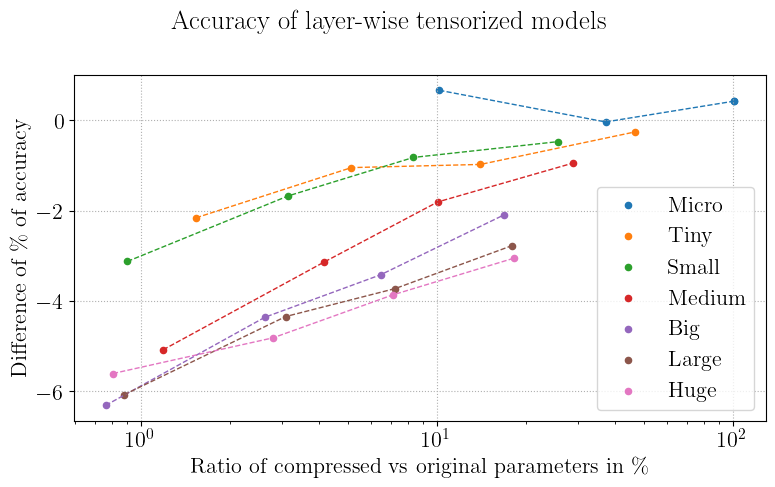

In [37]:
# plt.rc('font', family='serif', size=15)
plt.rc('font', family='serif', serif='Computer Modern', size=16)
plt.rc('text', usetex=True)

colormap = plt.get_cmap("tab10")
# colors = ['black', 'tab:blue', 'tab:orange', 'tab:green']

# markers = ['o', 's', 'D', '^']
# labels = ['Baseline NN', 'D = 2 (4k)', 'D = 5 (25k)', 'D = 10 (100k)']
model_sizes = {'Micro': 1000,
               'Tiny': 25000,
               'Small': 50000,
               'Medium': 52000,
               'Big': 110000,
               'Large': 122000,
               'Huge': 170000
               }

# mps_sizes = torch.Tensor([4000, 25000, 100000])
diff_accs = (accs_bond_dim.t()[:, 1:] - accs_bond_dim.t()[:, :1]) * 100

fig, axs = plt.subplots(1, 1, figsize=(8, 5))

# Accuracies tensorized models
# ----------------------------
for i, (model_name, da, sb) in enumerate(zip(model_sizes.keys(), diff_accs, sizes_bond_dim.t())):
    
    # aux_models = [f'{m}\n{model_sizes[m]}' for m in models_lst]
        
    x = (sb / model_sizes[model_name]) * 100
    axs.plot(x, da, linestyle='--', linewidth=1.)
    axs.scatter(x=x, y=da, s=20., label=model_name)
    
# Set axes
# axs.set_ylim(0.45, 0.95)
axs.yaxis.grid(linestyle=':')
axs.xaxis.grid(linestyle=':')
axs.set_xscale('log')
# axs.set_xlim(0.1, 200)

# Adding labels and title
# axs[0].set_xlabel('Neural Network model')
axs.set_ylabel('Difference of \% of accuracy')
axs.set_xlabel('Ratio of compressed vs original parameters in \%')
axs.legend(loc='lower right', bbox_to_anchor=(1., 0.))
# axs[0].set_title('Max. Acc. of 50 runs')


fig.suptitle('Accuracy of layer-wise tensorized models')

plt.tight_layout(pad=1.)
plt.show()